In [151]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error

In [152]:
df=pd.DataFrame(pd.read_excel('Pearl Challenge data with dictionary_For_Share_v4 - Copy.xlsx',sheet_name='TrainData'))

In [153]:
df.shape

(53303, 105)

In [154]:
df = df[~df['Target_Variable/Total Income'].isin([6000000000, 0,12])]

In [155]:
df.shape

(53296, 105)

In [156]:
df.duplicated().sum()

np.int64(0)

In [157]:
df['FarmerID'].duplicated().sum()

np.int64(24)

In [158]:
df.drop_duplicates(subset='FarmerID', keep='first', inplace=True)

In [159]:
df.shape

(53272, 105)

In [160]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [161]:
df.columns

Index(['FarmerID', 'State', 'REGION', 'SEX', 'CITY', 'Zipcode', 'DISTRICT',
       'VILLAGE', 'MARITAL_STATUS', 'Location',
       ...
       'Rabi Seasons Agro Ecological Sub Zone in 2020',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
       'Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020',
       ' Night light index',
       ' Village score based on socio-economic parameters (Non normalised)',
       ' Village score based on socio-economic parameters (0 to 100)',
       ' Village category based on socio-economic parameters (Good, Average, Poor)',
       ' Land Holding Index source (Total Agri Area/ no of people)',
       'Road density (Km/ SqKm)', 'Target_Variable/Total Income'],
      dtype='object', length=105)

In [162]:
#  Loading the columns 
columns = ['Target_Variable/Total Income',
           'No_of_Active_Loan_In_Bureau', 
           'Total_Land_For_Agriculture',
           'Perc_of_house_with_6plus_room',
           'perc_of_pop_living_in_hh_electricity',
           'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
          'mat_roof_Metal_GI_Asbestos_sheets',
           'perc_of_Wall_material_with_Burnt_brick',
           'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
            'Road density (Km/ SqKm)',
           'Rabi Seasons Type of soil in 2022',
           'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
           'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022',
          ]

#  Create a new DataFrame with only those columns
data = pd.DataFrame(df[columns])


In [163]:
data.columns

Index(['Target_Variable/Total Income', 'No_of_Active_Loan_In_Bureau',
       'Total_Land_For_Agriculture', 'Perc_of_house_with_6plus_room',
       'perc_of_pop_living_in_hh_electricity',
       'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
       'mat_roof_Metal_GI_Asbestos_sheets',
       'perc_of_Wall_material_with_Burnt_brick',
       'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
       'Road density (Km/ SqKm)', 'Rabi Seasons Type of soil in 2022',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022'],
      dtype='object')

In [164]:
data00=pd.DataFrame(df['Rabi Seasons Type of water bodies in hectares 2020'])

In [165]:
data0 = pd.DataFrame(data00['Rabi Seasons Type of water bodies in hectares 2020'].where(pd.notna(data00['Rabi Seasons Type of water bodies in hectares 2020']), None))


In [166]:
data0=data0['Rabi Seasons Type of water bodies in hectares 2020'].tolist()

In [167]:
cleaned = [item.strip("'") if isinstance(item, str) else item for item in data0]

In [168]:
pd.DataFrame(cleaned)

,0
0,water
1,None
2,water
3,river
4,None
...,...
53267,water
53268,None
53269,None
53270,reservoir


In [169]:
# Create a DataFrame
data1 = pd.DataFrame({'water_sources': cleaned})

In [170]:
data1

,water_sources
0,water
1,None
2,water
3,river
4,None
...,...
53267,water
53268,None
53269,None
53270,reservoir


In [171]:
data1['water_sources'] = data1['water_sources'].fillna('')
data1['water_list'] = data1['water_sources'].apply(lambda x: x.split(', ') if x else [])

In [172]:
mlb = MultiLabelBinarizer()
water_encoded = pd.DataFrame(mlb.fit_transform(data1['water_list']), columns=mlb.classes_, index=df.index)


In [173]:
water_encoded

,reservoir,river,riverbank,water,wetland
0,0,0,0,1,0
1,0,0,0,0,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
53298,0,0,0,1,0
53299,0,0,0,0,0
53300,0,0,0,0,0
53301,1,0,0,0,0


In [174]:
data=pd.concat([data,water_encoded],axis=1)


In [175]:
data.columns

Index(['Target_Variable/Total Income', 'No_of_Active_Loan_In_Bureau',
       'Total_Land_For_Agriculture', 'Perc_of_house_with_6plus_room',
       'perc_of_pop_living_in_hh_electricity',
       'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
       'mat_roof_Metal_GI_Asbestos_sheets',
       'perc_of_Wall_material_with_Burnt_brick',
       'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
       'Road density (Km/ SqKm)', 'Rabi Seasons Type of soil in 2022',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020',
       'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022',
       'reservoir', 'river', 'riverbank', 'water', 'wetland'],
      dtype='object')

In [176]:
data

,Target_Variable/Total Income,No_of_Active_Loan_In_Bureau,Total_Land_For_Agriculture,Perc_of_house_with_6plus_room,perc_of_pop_living_in_hh_electricity,perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms,mat_roof_Metal_GI_Asbestos_sheets,perc_of_Wall_material_with_Burnt_brick,perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k,Road density (Km/ SqKm),Rabi Seasons Type of soil in 2022,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2022,reservoir,river,riverbank,water,wetland
0,1360000,0,10.00,1.23,99.30,2.22,0.74,35.43,15.10,0.00,Deep Black soils (with shallow and medium Blac...,97.24,92.64,0,0,0,1,0
1,850000,0,12.00,1.77,98.60,3.97,0.34,11.44,7.17,0.00,Deep Black soils (with shallow and medium Blac...,95.31,93.33,0,0,0,0,0
2,807200,1,6.00,1.41,95.85,3.77,7.98,54.50,2.54,0.00,Mixed Red and Black Soils,73.96,78.21,0,0,0,1,0
3,500000,14,5.00,0.77,99.90,3.04,8.51,33.60,8.09,0.00,Deep Black soils (with shallow and medium Blac...,90.05,87.51,0,1,0,0,0
4,558000,0,5.25,1.28,97.12,9.71,76.31,48.47,15.59,2.49,Shallow Black Soils (with medium and deep Blac...,94.64,96.83,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53298,850000,0,NaN,1.51,99.30,6.65,3.92,46.97,0.61,23.87,Red loamy Soils,102.26,111.00,0,0,0,1,0
53299,1300000,3,9.00,0.45,99.30,5.75,2.29,33.78,0.79,9.17,Red loamy Soils,88.00,96.91,0,0,0,0,0
53300,800000,0,6.00,1.51,99.30,6.65,3.92,46.97,0.61,2.97,Red loamy Soils,106.13,110.06,0,0,0,0,0
53301,1280000,0,5.00,0.14,99.28,6.15,4.57,39.40,1.08,6.96,Red loamy Soils,88.00,96.91,1,0,0,0,0


In [177]:
data['Rabi Seasons Type of soil in 2022']

0        Deep Black soils (with shallow and medium Blac...
1        Deep Black soils (with shallow and medium Blac...
2                                Mixed Red and Black Soils
3        Deep Black soils (with shallow and medium Blac...
4        Shallow Black Soils (with medium and deep Blac...
                               ...                        
53298                                      Red loamy Soils
53299                                      Red loamy Soils
53300                                      Red loamy Soils
53301                                      Red loamy Soils
53302                                      Red loamy Soils
Name: Rabi Seasons Type of soil in 2022, Length: 53272, dtype: object

In [178]:


# Define the custom order for education levels
soil_order = [['Desert (saline) Soils',
               'Shallow Black Soils (with medium and deep Black Soils as  inclusion)',
               'Mixed Red and Black Soils',
               'Red and lateritic Soils',
              'Red loamy Soils',
              'Alluvial-derived Soils (with saline phases)',
              'Coastal and Deltaic Alluvium derived Soils',
              'Deep Black soils (with shallow and medium Black Soils as inclusion)']]

# Create encoder with the custom order
encoder = OrdinalEncoder(categories=soil_order)


# Apply the encoder
data['Rabi Seasons Type of soil in 2022'] = encoder.fit_transform(data[['Rabi Seasons Type of soil in 2022']])


In [179]:
data['Road density (Km/ SqKm)']=data['Road density (Km/ SqKm)'].fillna(
    data['Road density (Km/ SqKm)'].mode())

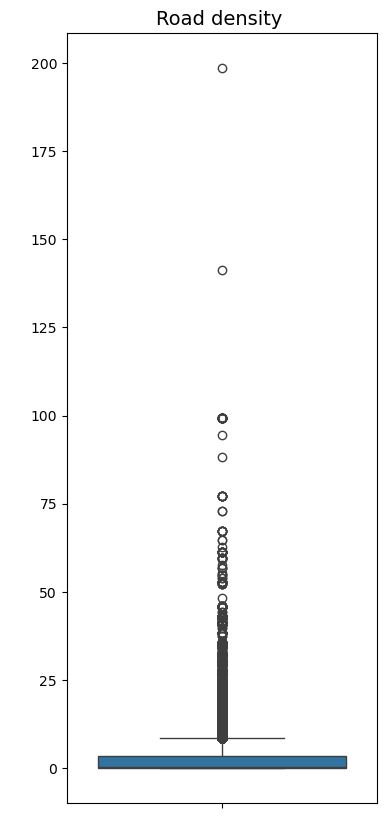

In [180]:
plt.figure(figsize=(4, 10))  # Set width and height (tall vertical)
sns.boxplot(y=data['Road density (Km/ SqKm)'])  # Use y= for vertical
plt.title("Road density ", fontsize=14)
plt.xlabel("")  # optional: remove x-label
plt.ylabel(" ", fontsize=12)
plt.show()

In [181]:
Q1 = data['Road density (Km/ SqKm)'].quantile(0.25)
Q3 = data['Road density (Km/ SqKm)'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
data['Road density (Km/ SqKm)']= data['Road density (Km/ SqKm)'].clip( upper=upper_limit)


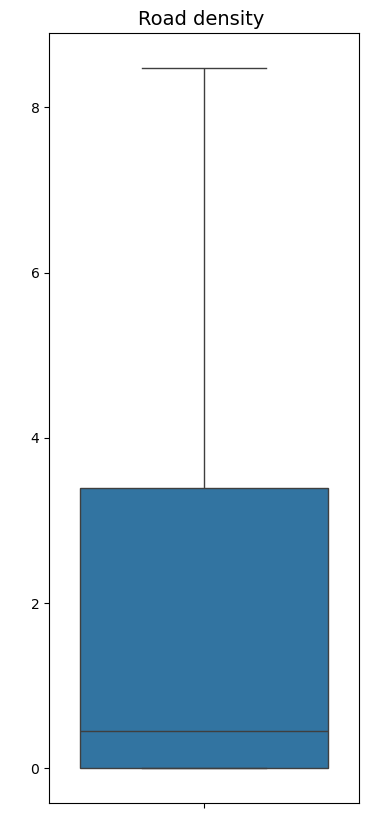

In [182]:
plt.figure(figsize=(4, 10))  # Set width and height (tall vertical)
sns.boxplot(y=data['Road density (Km/ SqKm)'])  # Use y= for vertical
plt.title("Road density ", fontsize=14)
plt.xlabel("")  # optional: remove x-label
plt.ylabel(" ", fontsize=12)
plt.show()

In [183]:
data['mat_roof_Metal_GI_Asbestos_sheets']=data['mat_roof_Metal_GI_Asbestos_sheets'].fillna(
    data['mat_roof_Metal_GI_Asbestos_sheets'].mean())

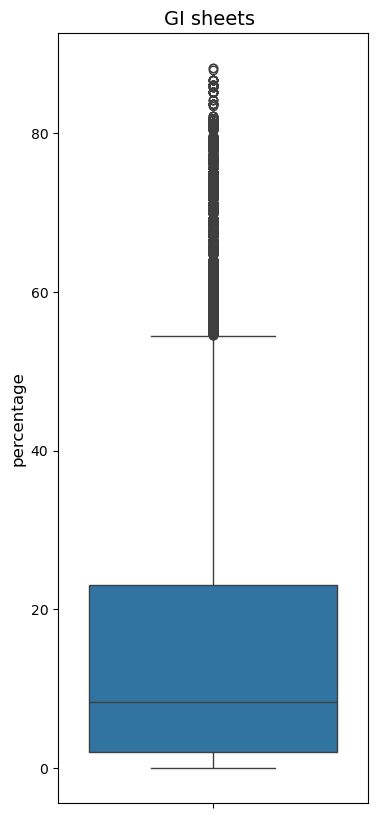

In [184]:
plt.figure(figsize=(4, 10))  # Set width and height (tall vertical)
sns.boxplot(y=data['mat_roof_Metal_GI_Asbestos_sheets'])  # Use y= for vertical
plt.title("GI sheets ", fontsize=14)
plt.xlabel("")  # optional: remove x-label
plt.ylabel("percentage", fontsize=12)
plt.show()

In [185]:
Q1 = data['mat_roof_Metal_GI_Asbestos_sheets'].quantile(0.25)
Q3 = data['mat_roof_Metal_GI_Asbestos_sheets'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
data['mat_roof_Metal_GI_Asbestos_sheets']= data['mat_roof_Metal_GI_Asbestos_sheets'].clip( upper=upper_limit)


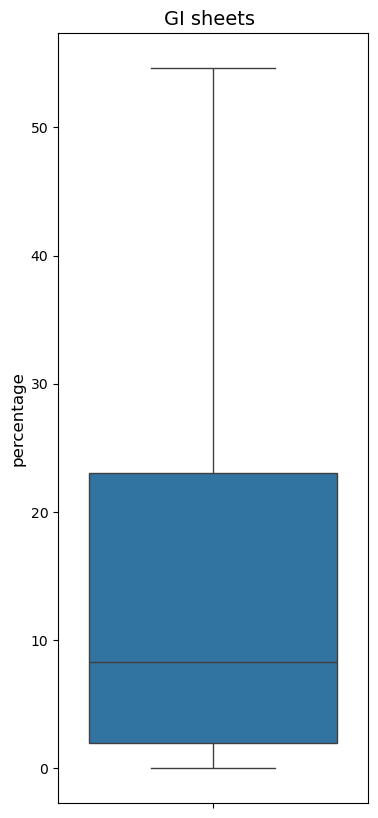

In [186]:
plt.figure(figsize=(4, 10))  
sns.boxplot(y=data['mat_roof_Metal_GI_Asbestos_sheets']) 
plt.title("GI sheets ", fontsize=14)
plt.xlabel("")  
plt.ylabel("percentage", fontsize=12)
plt.show()

In [187]:
data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'].isna().sum()

np.int64(185)

In [188]:
data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms']=data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'].fillna(
    data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'].mean())

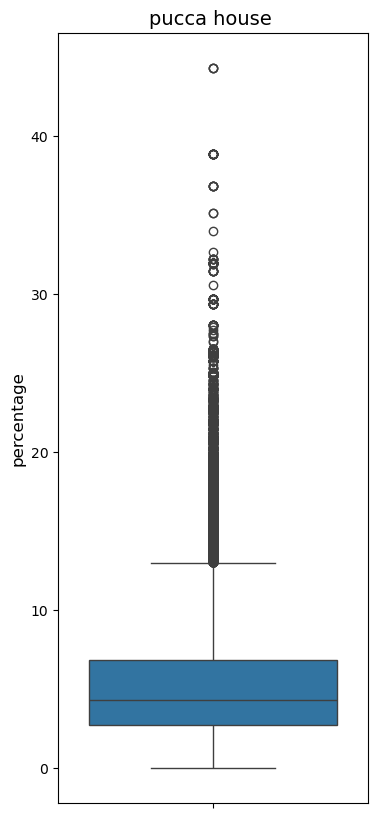

In [189]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'])  
plt.title("pucca house ", fontsize=14)
plt.xlabel("") 
plt.ylabel("percentage", fontsize=12)
plt.show()

In [190]:
Q1 = data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'].quantile(0.25)
Q3 = data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms']= data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'].clip( upper=upper_limit)


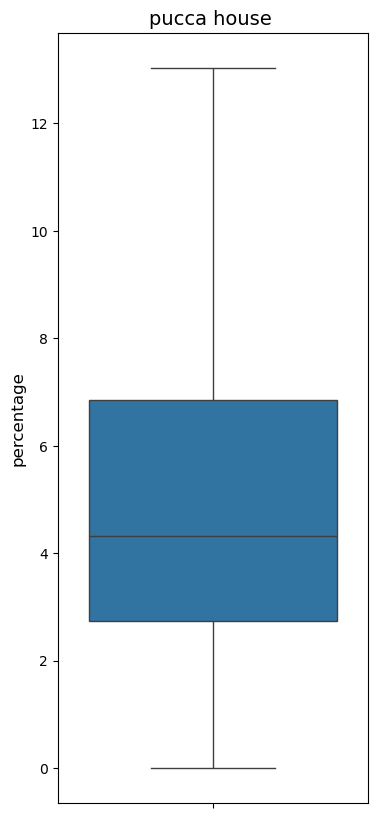

In [191]:
plt.figure(figsize=(4, 10))  
sns.boxplot(y=data['perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms'])
plt.title("pucca house ", fontsize=14)
plt.xlabel("")  
plt.ylabel("percentage", fontsize=12)
plt.show()

In [192]:
data['perc_of_Wall_material_with_Burnt_brick'].isna().sum()

np.int64(185)

In [193]:
data['perc_of_Wall_material_with_Burnt_brick']=data['perc_of_Wall_material_with_Burnt_brick'].fillna(
    data['perc_of_Wall_material_with_Burnt_brick'].mean())

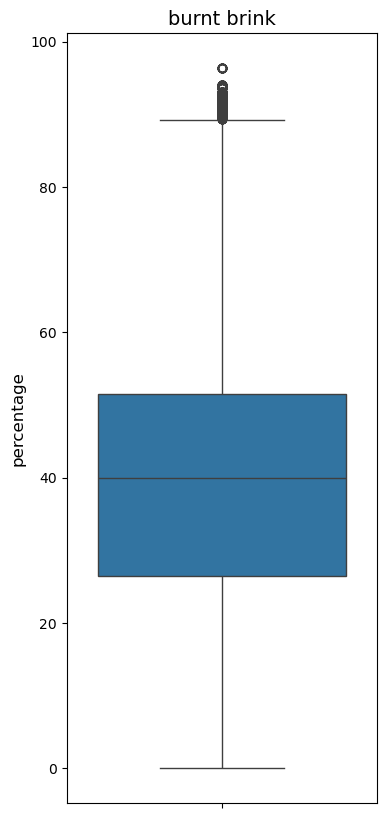

In [194]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['perc_of_Wall_material_with_Burnt_brick']) 
plt.title("burnt brink", fontsize=14)
plt.xlabel("") 
plt.ylabel("percentage", fontsize=12)
plt.show()

In [195]:
Q1 = data['perc_of_Wall_material_with_Burnt_brick'].quantile(0.25)
Q3 = data['perc_of_Wall_material_with_Burnt_brick'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
data['perc_of_Wall_material_with_Burnt_brick'] = data['perc_of_Wall_material_with_Burnt_brick'].clip( upper=upper_limit)


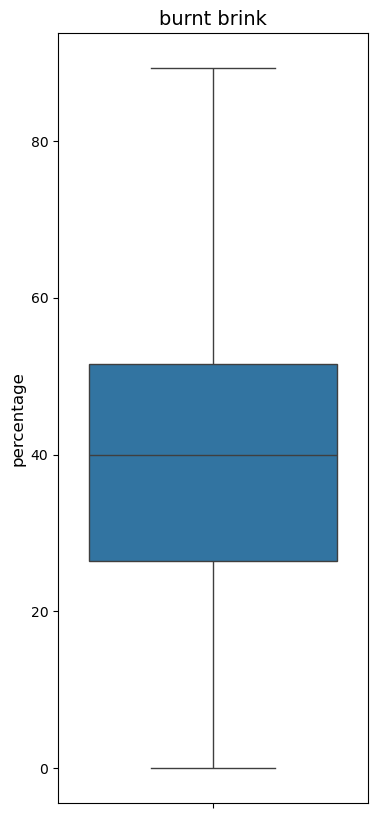

In [196]:
plt.figure(figsize=(4, 10))  
sns.boxplot(y=data['perc_of_Wall_material_with_Burnt_brick']) 
plt.title("burnt brink", fontsize=14)
plt.xlabel("") 
plt.ylabel("percentage", fontsize=12)
plt.show()

In [197]:
data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'].isna().sum()

np.int64(185)

In [198]:
data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'] = data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'].fillna(
    data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'].mean())

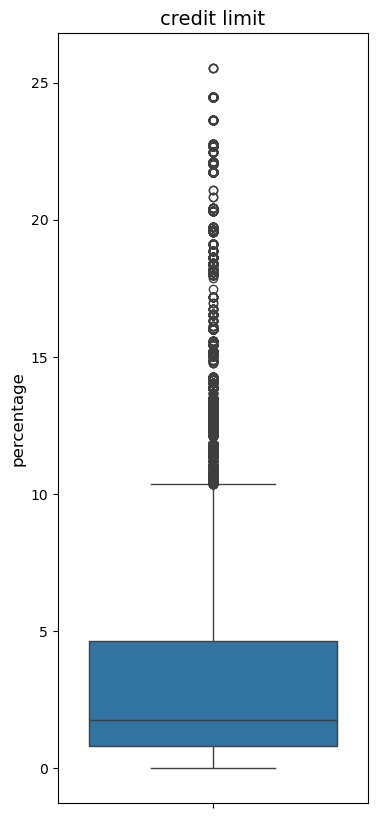

In [199]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'])  
plt.title("credit limit", fontsize=14)
plt.xlabel("")  
plt.ylabel("percentage", fontsize=12)
plt.show()

In [200]:
upper_cap = data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'].quantile(0.92)
data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'] = data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'].clip(upper=upper_cap)

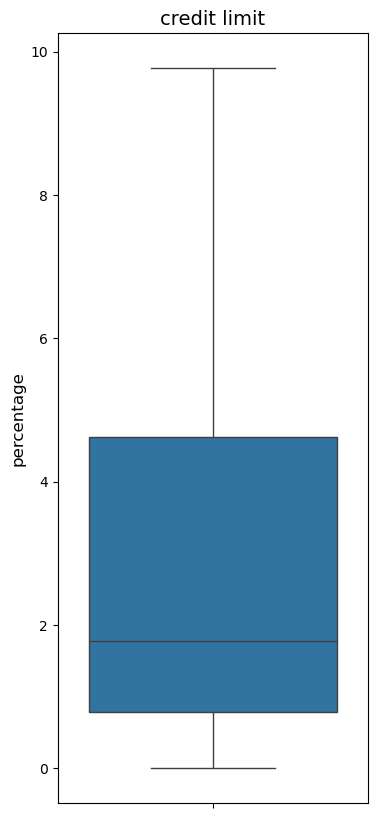

In [201]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k'])  
plt.title("credit limit", fontsize=14)
plt.xlabel("") 
plt.ylabel("percentage", fontsize=12)
plt.show()

In [202]:
data['Perc_of_house_with_6plus_room'] = data['Perc_of_house_with_6plus_room'].fillna(
    data['Perc_of_house_with_6plus_room'].mean())

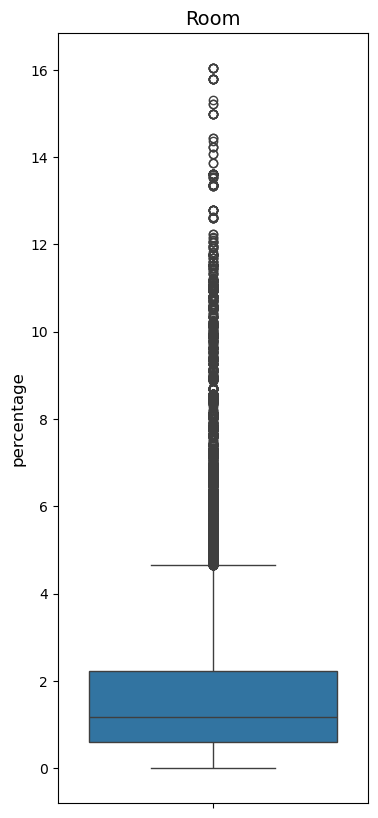

In [203]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['Perc_of_house_with_6plus_room'])  
plt.title("Room", fontsize=14)
plt.xlabel("") 
plt.ylabel("percentage", fontsize=12)
plt.show()

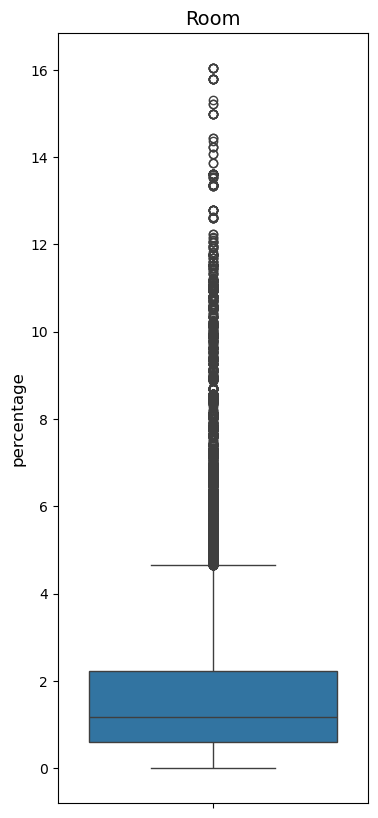

In [204]:
plt.figure(figsize=(4, 10))  
sns.boxplot(y=data['Perc_of_house_with_6plus_room']) 
plt.title("Room", fontsize=14)
plt.xlabel("") 
plt.ylabel("percentage", fontsize=12)
plt.show()

In [205]:
upper_cap = data['Perc_of_house_with_6plus_room'].quantile(0.94)
data['Perc_of_house_with_6plus_room'] = data['Perc_of_house_with_6plus_room'].clip(upper=upper_cap)

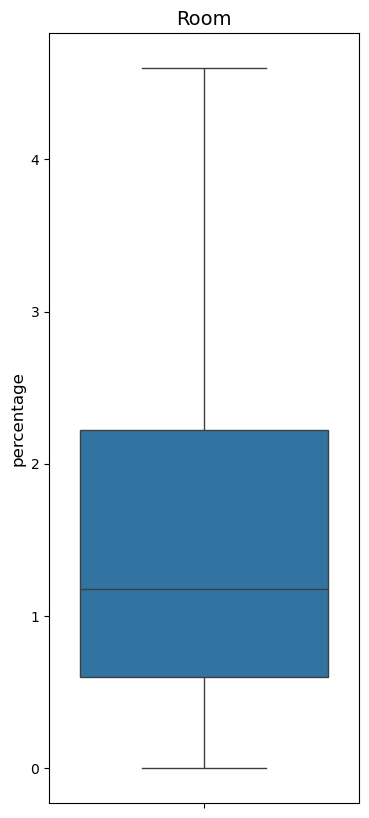

In [206]:
plt.figure(figsize=(4, 10))  
sns.boxplot(y=data['Perc_of_house_with_6plus_room'])  
plt.title("Room", fontsize=14)
plt.xlabel("")  
plt.ylabel("percentage", fontsize=12)
plt.show()

In [207]:
data['perc_of_pop_living_in_hh_electricity'] = data['perc_of_pop_living_in_hh_electricity'].fillna(
    data['perc_of_pop_living_in_hh_electricity'].mode()[0])


In [208]:
data['perc_of_pop_living_in_hh_electricity'].isna().sum()

np.int64(0)

In [209]:
data['perc_of_pop_living_in_hh_electricity'] = data['perc_of_pop_living_in_hh_electricity'].astype(int)


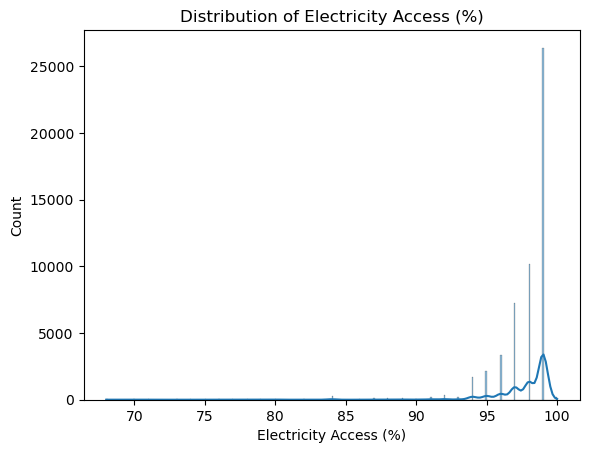

In [210]:
sns.histplot(data['perc_of_pop_living_in_hh_electricity'], kde=True)
plt.title("Distribution of Electricity Access (%)")
plt.xlabel("Electricity Access (%)")
plt.show()

In [211]:
print((data['perc_of_pop_living_in_hh_electricity'] < 80).sum())


328


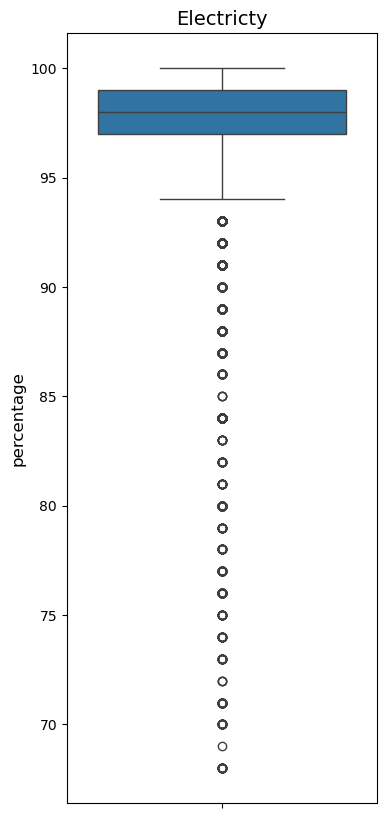

In [212]:
plt.figure(figsize=(4, 10))  # Set width and height (tall vertical)
sns.boxplot(y=data['perc_of_pop_living_in_hh_electricity'])  # Use y= for vertical
plt.title("Electricty", fontsize=14)
plt.xlabel("")  # optional: remove x-label
plt.ylabel("percentage", fontsize=12)
plt.show()

In [213]:

Q1 = data['perc_of_pop_living_in_hh_electricity'].quantile(0.25)
Q3 = data['perc_of_pop_living_in_hh_electricity'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 3.0 * IQR

data['perc_of_pop_living_in_hh_electricity'] =  np.where(data['perc_of_pop_living_in_hh_electricity'] < lower, lower, data['perc_of_pop_living_in_hh_electricity'])


In [214]:

data['SEX'] = df['SEX'].map({'M': 1, 'F': 0})

In [215]:
dummies = pd.get_dummies(df['MARITAL_STATUS'], prefix='MARITAL_STATUS', drop_first=True)
data = pd.concat([data, dummies], axis=1)


In [216]:
df.groupby('Address type')['Target_Variable/Total Income'].mean()

Address type
Both Addresses       1.148558e+06
Current Address      1.209269e+06
Permanent Address    1.205058e+06
Name: Target_Variable/Total Income, dtype: float64

In [217]:
print(df['Address type'].value_counts(dropna=False))

Address type
Permanent Address    29085
NaN                  18946
Current Address       4404
Both Addresses         837
Name: count, dtype: int64


In [218]:
missing_percent = df['Address type'].isna().mean() * 100
print(f"Missing: {missing_percent:.2f}%")

Missing: 35.56%


In [219]:
df['Address type'].fillna('Unknown', inplace=True)

# Create dummy variables
dummies = pd.get_dummies(df['Address type'], drop_first=True)

# Join back to the original DataFrame (or `data`)
data = pd.concat([data, dummies], axis=1)


/tmp/ipykernel_8173/4103981425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Address type'].fillna('Unknown', inplace=True)


In [220]:
data.dtypes

Target_Variable/Total Income                                          int64
No_of_Active_Loan_In_Bureau                                           int64
Total_Land_For_Agriculture                                          float64
Perc_of_house_with_6plus_room                                       float64
perc_of_pop_living_in_hh_electricity                                float64
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms         float64
mat_roof_Metal_GI_Asbestos_sheets                                   float64
perc_of_Wall_material_with_Burnt_brick                              float64
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k        float64
Road density (Km/ SqKm)                                             float64
Rabi Seasons Type of soil in 2022                                   float64
Rabi Seasons Seasonal average groundwater thickness (cm) in 2020    float64
Rabi Seasons Seasonal average groundwater thickness (cm) in 2022    float64
reservoir   

In [221]:
correlation = df['Target_Variable/Total Income'].corr(df['Households_with_improved_Sanitation_Facility'])
print("Correlation:", correlation)

Correlation: -0.0024775554569303813


In [222]:
df_temp = pd.DataFrame()
df_k021 = df['K021-Ambient temperature (min & max)'].str.split('/', expand=True)
df_k021.columns = ['K021-Ambient temperature-min', 'K021-Ambient temperature-max']
df_temp = pd.concat([df_temp, df_k021], axis=1)

df_k022 = df['K022-Ambient temperature (min & max)'].str.split('/', expand=True)
df_k022.columns = ['K022-Ambient temperature-min', 'K022-Ambient temperature-max']
df_temp = pd.concat([df_temp, df_k022], axis=1)

df_r021 = df['R021-Ambient temperature (min & max)'].str.split('/', expand=True)
df_r021.columns = ['R021-Ambient temperature-min', 'R021-Ambient temperature-max']
df_temp = pd.concat([df_temp, df_r021], axis=1)

df_r022 = df['R022-Ambient temperature (min & max)'].str.split('/', expand=True)
df_r022.columns = ['R022-Ambient temperature-min', 'R022-Ambient temperature-max']
df_temp = pd.concat([df_temp, df_r022], axis=1)

df_temp=pd.concat([df_temp,df[['K021-Seasonal Average Rainfall (mm)','K022-Seasonal Average Rainfall (mm)',
                               'R021-Seasonal Average Rainfall (mm)','R022-Seasonal Average Rainfall (mm)']]],axis=1)
df_temp=df_temp.astype(float)

In [223]:
df_temp

,K021-Ambient temperature-min,K021-Ambient temperature-max,K022-Ambient temperature-min,K022-Ambient temperature-max,R021-Ambient temperature-min,R021-Ambient temperature-max,R022-Ambient temperature-min,R022-Ambient temperature-max,K021-Seasonal Average Rainfall (mm),K022-Seasonal Average Rainfall (mm),R021-Seasonal Average Rainfall (mm),R022-Seasonal Average Rainfall (mm)
0,23.29,29.78,23.34,30.33,16.48,30.02,16.19,29.07,952.67,1633.97,99.67,81.26
1,23.88,30.97,23.70,31.03,15.17,28.53,14.93,27.92,1072.59,1584.60,269.39,132.10
2,23.39,29.89,23.28,29.99,19.54,30.98,19.70,30.52,892.01,1177.70,49.64,41.84
3,23.14,30.22,23.25,31.26,16.21,29.91,15.62,28.67,1144.94,1534.28,52.52,211.06
4,21.81,28.33,22.00,28.61,19.32,31.01,19.81,31.15,1050.47,1366.66,162.00,44.38
...,...,...,...,...,...,...,...,...,...,...,...,...
53298,19.52,25.01,19.19,25.21,17.26,27.90,17.49,27.85,725.70,1087.54,201.03,435.56
53299,21.34,27.86,21.02,27.88,18.88,30.91,19.00,29.80,603.76,1023.46,110.26,238.95
53300,19.61,24.92,19.26,25.26,17.57,28.20,17.65,28.03,797.45,1174.49,189.54,457.29
53301,21.34,27.86,21.02,27.88,18.88,30.91,19.00,29.80,603.76,1023.46,110.26,238.95


In [224]:
columns=df_temp.columns
for col in columns:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
  
    outliers_mask = (df_temp[col] < lower_limit) | (df_temp[col]  > upper_limit)
    
   
    outlier_count = outliers_mask.sum()
    print(f"Number of outliers in ",col,":", outlier_count)

Number of outliers in  K021-Ambient temperature-min : 333
Number of outliers in  K021-Ambient temperature-max : 1810
Number of outliers in  K022-Ambient temperature-min : 778
Number of outliers in  K022-Ambient temperature-max : 1811
Number of outliers in  R021-Ambient temperature-min : 0
Number of outliers in  R021-Ambient temperature-max : 38
Number of outliers in  R022-Ambient temperature-min : 0
Number of outliers in  R022-Ambient temperature-max : 38
Number of outliers in  K021-Seasonal Average Rainfall (mm) : 128
Number of outliers in  K022-Seasonal Average Rainfall (mm) : 0
Number of outliers in  R021-Seasonal Average Rainfall (mm) : 1803
Number of outliers in  R022-Seasonal Average Rainfall (mm) : 4194


In [225]:
columns = df_temp[['K021-Ambient temperature-min', 'K021-Ambient temperature-max',
                   'K022-Ambient temperature-min', 'K022-Ambient temperature-max',
                   'R021-Seasonal Average Rainfall (mm)','R022-Seasonal Average Rainfall (mm)']]

for _ in range(4):  # Two iterations changed to four
    for col in columns:
        Q1 = df_temp[col].quantile(0.25)
        Q3 = df_temp[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        median = df_temp[col].median()

        df_temp.loc[(df_temp[col] < lower) | (df_temp[col] > upper), col] = median

In [226]:
columns=df_temp.columns
for col in columns:
    Q1 = df_temp[col].quantile(0.25)
    Q3 = df_temp[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Boolean mask of outliers
    outliers_mask = (df_temp[col] < lower_limit) | (df_temp[col]  > upper_limit)
    
    # Count of outliers
    outlier_count = outliers_mask.sum()
    print(f"Number of outliers in ",col,":", outlier_count)

Number of outliers in  K021-Ambient temperature-min : 0
Number of outliers in  K021-Ambient temperature-max : 1848
Number of outliers in  K022-Ambient temperature-min : 0
Number of outliers in  K022-Ambient temperature-max : 17
Number of outliers in  R021-Ambient temperature-min : 0
Number of outliers in  R021-Ambient temperature-max : 38
Number of outliers in  R022-Ambient temperature-min : 0
Number of outliers in  R022-Ambient temperature-max : 38
Number of outliers in  K021-Seasonal Average Rainfall (mm) : 128
Number of outliers in  K022-Seasonal Average Rainfall (mm) : 0
Number of outliers in  R021-Seasonal Average Rainfall (mm) : 463
Number of outliers in  R022-Seasonal Average Rainfall (mm) : 1688


In [227]:
data=pd.concat([df_temp,data],axis=1)

In [228]:
data

,K021-Ambient temperature-min,K021-Ambient temperature-max,K022-Ambient temperature-min,K022-Ambient temperature-max,R021-Ambient temperature-min,R021-Ambient temperature-max,R022-Ambient temperature-min,R022-Ambient temperature-max,K021-Seasonal Average Rainfall (mm),K022-Seasonal Average Rainfall (mm),...,river,riverbank,water,wetland,SEX,MARITAL_STATUS_NK,MARITAL_STATUS_S,Current Address,Permanent Address,Unknown
0,23.29,29.78,23.34,30.33,16.48,30.02,16.19,29.07,952.67,1633.97,...,0,0,1,0,1,False,False,False,False,True
1,23.88,30.97,23.70,31.03,15.17,28.53,14.93,27.92,1072.59,1584.60,...,0,0,0,0,1,False,False,False,True,False
2,23.39,29.89,23.28,29.99,19.54,30.98,19.70,30.52,892.01,1177.70,...,0,0,1,0,1,False,False,False,False,True
3,23.14,30.22,23.25,31.26,16.21,29.91,15.62,28.67,1144.94,1534.28,...,1,0,0,0,1,False,False,False,False,True
4,21.81,28.33,22.00,28.61,19.32,31.01,19.81,31.15,1050.47,1366.66,...,0,0,0,0,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53298,23.36,29.98,23.30,30.36,17.26,27.90,17.49,27.85,725.70,1087.54,...,0,0,1,0,1,False,False,False,False,True
53299,21.34,27.86,21.02,27.88,18.88,30.91,19.00,29.80,603.76,1023.46,...,0,0,0,0,1,False,True,False,True,False
53300,23.36,29.98,23.30,30.36,17.57,28.20,17.65,28.03,797.45,1174.49,...,0,0,0,0,1,False,False,False,True,False
53301,21.34,27.86,21.02,27.88,18.88,30.91,19.00,29.80,603.76,1023.46,...,0,0,0,0,1,False,False,False,True,False


In [229]:
df['R022-Village category based on Agri parameters (Good, Average, Poor)'].value_counts()

R022-Village category based on Agri parameters (Good, Average, Poor)
Poor       46072
Average     7200
Name: count, dtype: int64

In [230]:
df['K022-Village category based on Agri parameters (Good, Average, Poor)'].value_counts()

K022-Village category based on Agri parameters (Good, Average, Poor)
Poor       40519
Average    12753
Name: count, dtype: int64

In [231]:
df_=pd.DataFrame()
df_['K022villagecatagripara'] = df['K022-Village category based on Agri parameters (Good, Average, Poor)'].map({
    'Poor': 0,
    'Average': 1, 'Good': 2})
data=pd.concat([df_,data],axis=1)

In [232]:
df['K022-Village category based on socio-economic parameters (Good, Average, Poor)'].value_counts()

K022-Village category based on socio-economic parameters (Good, Average, Poor)
Poor       32518
Average    19726
Good        1028
Name: count, dtype: int64

In [233]:
df[' Village category based on socio-economic parameters (Good, Average, Poor)'].value_counts()

 Village category based on socio-economic parameters (Good, Average, Poor)
Poor       32518
Average    19726
Good        1028
Name: count, dtype: int64

In [234]:
df_=pd.DataFrame()
df_['R022villagecatagripara'] = df['R022-Village category based on Agri parameters (Good, Average, Poor)'].map({
    'Poor': 0,
    'Average': 1, 'Good': 2})
data=pd.concat([df_,data],axis=1)

In [235]:
# Label encode categorical columns
district=pd.DataFrame()
le_district = LabelEncoder()
district['DISTRICT'] = le_district.fit_transform(df['DISTRICT'])
city=pd.DataFrame()
le_city = LabelEncoder()
city['CITY'] = le_city.fit_transform(df['CITY'])

In [236]:
data

,R022villagecatagripara,K022villagecatagripara,K021-Ambient temperature-min,K021-Ambient temperature-max,K022-Ambient temperature-min,K022-Ambient temperature-max,R021-Ambient temperature-min,R021-Ambient temperature-max,R022-Ambient temperature-min,R022-Ambient temperature-max,...,river,riverbank,water,wetland,SEX,MARITAL_STATUS_NK,MARITAL_STATUS_S,Current Address,Permanent Address,Unknown
0,0,0,23.29,29.78,23.34,30.33,16.48,30.02,16.19,29.07,...,0,0,1,0,1,False,False,False,False,True
1,1,1,23.88,30.97,23.70,31.03,15.17,28.53,14.93,27.92,...,0,0,0,0,1,False,False,False,True,False
2,0,0,23.39,29.89,23.28,29.99,19.54,30.98,19.70,30.52,...,0,0,1,0,1,False,False,False,False,True
3,1,1,23.14,30.22,23.25,31.26,16.21,29.91,15.62,28.67,...,1,0,0,0,1,False,False,False,False,True
4,1,1,21.81,28.33,22.00,28.61,19.32,31.01,19.81,31.15,...,0,0,0,0,1,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53298,0,0,23.36,29.98,23.30,30.36,17.26,27.90,17.49,27.85,...,0,0,1,0,1,False,False,False,False,True
53299,0,1,21.34,27.86,21.02,27.88,18.88,30.91,19.00,29.80,...,0,0,0,0,1,False,True,False,True,False
53300,0,0,23.36,29.98,23.30,30.36,17.57,28.20,17.65,28.03,...,0,0,0,0,1,False,False,False,True,False
53301,1,1,21.34,27.86,21.02,27.88,18.88,30.91,19.00,29.80,...,0,0,0,0,1,False,False,False,True,False


In [237]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
city['CITY'] = scaler.fit_transform(city)

scaler = MinMaxScaler()
district['DISTRICT'] = scaler.fit_transform(district)
district['DISTRICT'] = district['DISTRICT'].round(2)
print(district)
city['CITY'] = city['CITY'].round(2)


       DISTRICT
0          0.76
1          0.05
2          0.64
3          0.60
4          0.55
...         ...
53267      0.36
53268      0.36
53269      0.36
53270      0.36
53271      0.36

[53272 rows x 1 columns]


In [238]:
data.isna().sum()

R022villagecatagripara                                               0
K022villagecatagripara                                               0
K021-Ambient temperature-min                                         0
K021-Ambient temperature-max                                         0
K022-Ambient temperature-min                                         0
K022-Ambient temperature-max                                         0
R021-Ambient temperature-min                                         0
R021-Ambient temperature-max                                         0
R022-Ambient temperature-min                                         0
R022-Ambient temperature-max                                         0
K021-Seasonal Average Rainfall (mm)                                  0
K022-Seasonal Average Rainfall (mm)                                  0
R021-Seasonal Average Rainfall (mm)                                  0
R022-Seasonal Average Rainfall (mm)                                  0
Target

In [239]:
data=pd.concat((data,district,city),axis=1)

In [240]:
data=data.dropna()
data.isna().sum()

R022villagecatagripara                                              0
K022villagecatagripara                                              0
K021-Ambient temperature-min                                        0
K021-Ambient temperature-max                                        0
K022-Ambient temperature-min                                        0
K022-Ambient temperature-max                                        0
R021-Ambient temperature-min                                        0
R021-Ambient temperature-max                                        0
R022-Ambient temperature-min                                        0
R022-Ambient temperature-max                                        0
K021-Seasonal Average Rainfall (mm)                                 0
K022-Seasonal Average Rainfall (mm)                                 0
R021-Seasonal Average Rainfall (mm)                                 0
R022-Seasonal Average Rainfall (mm)                                 0
Target_Variable/Tota

In [241]:
data.count()

R022villagecatagripara                                              53164
K022villagecatagripara                                              53164
K021-Ambient temperature-min                                        53164
K021-Ambient temperature-max                                        53164
K022-Ambient temperature-min                                        53164
K022-Ambient temperature-max                                        53164
R021-Ambient temperature-min                                        53164
R021-Ambient temperature-max                                        53164
R022-Ambient temperature-min                                        53164
R022-Ambient temperature-max                                        53164
K021-Seasonal Average Rainfall (mm)                                 53164
K022-Seasonal Average Rainfall (mm)                                 53164
R021-Seasonal Average Rainfall (mm)                                 53164
R022-Seasonal Average Rainfall (mm)   

In [242]:
data['No_of_Active_Loan_In_Bureau']

0         0.0
1         0.0
2         1.0
3        14.0
4         0.0
         ... 
53267     0.0
53268     6.0
53269     3.0
53270     0.0
53271     9.0
Name: No_of_Active_Loan_In_Bureau, Length: 53164, dtype: float64

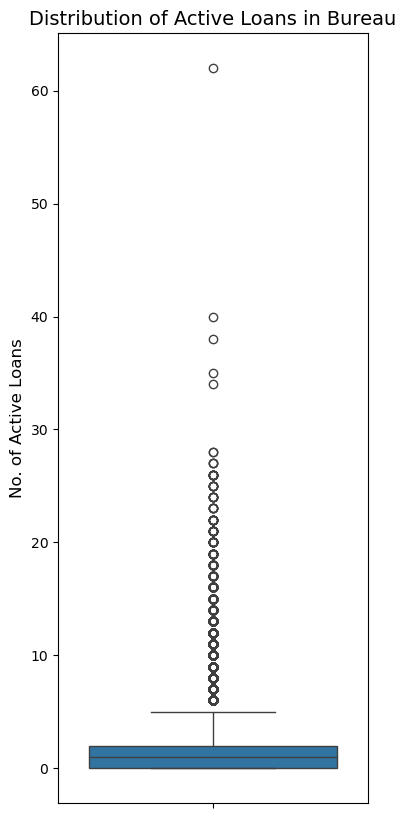

In [243]:
plt.figure(figsize=(4, 10))  # Set width and height (tall vertical)
sns.boxplot(y=data['No_of_Active_Loan_In_Bureau'])  # Use y= for vertical
plt.title("Distribution of Active Loans in Bureau", fontsize=14)
plt.xlabel("")  # optional: remove x-label
plt.ylabel("No. of Active Loans", fontsize=12)
plt.show()



In [244]:
upper_cap = data['No_of_Active_Loan_In_Bureau'].quantile(0.90)
data['No_of_Active_Loan_In_Bureau'] = data['No_of_Active_Loan_In_Bureau'].clip(upper=upper_cap)

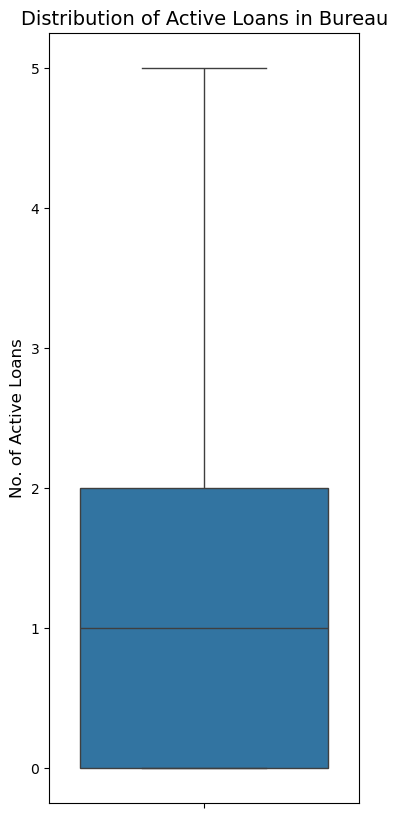

In [245]:
plt.figure(figsize=(4, 10))  # Set width and height (tall vertical)
sns.boxplot(y=data['No_of_Active_Loan_In_Bureau'])  # Use y= for vertical
plt.title("Distribution of Active Loans in Bureau", fontsize=14)
plt.xlabel("")  # optional: remove x-label
plt.ylabel("No. of Active Loans", fontsize=12)
plt.show()


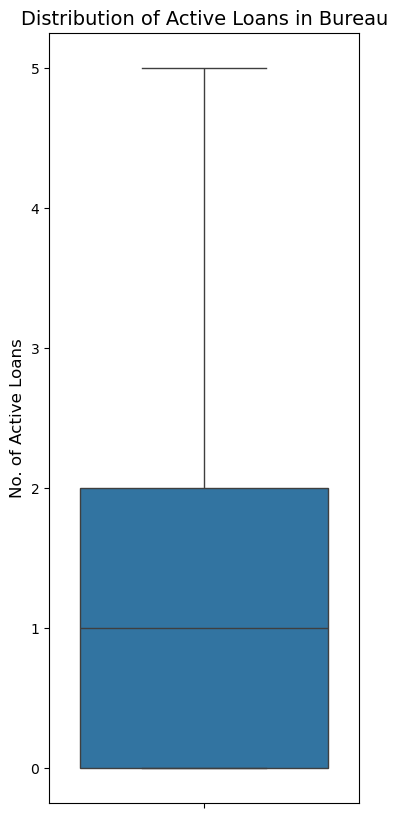

In [246]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['No_of_Active_Loan_In_Bureau'])  
plt.title("Distribution of Active Loans in Bureau", fontsize=14)
plt.xlabel("") 
plt.ylabel("No. of Active Loans", fontsize=12)
plt.show()

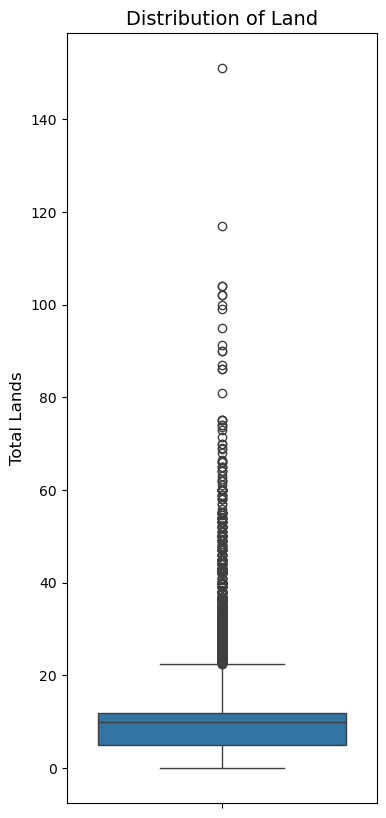

In [247]:
plt.figure(figsize=(4, 10)) 
sns.boxplot(y=data['Total_Land_For_Agriculture'])  
plt.title("Distribution of Land", fontsize=14)
plt.xlabel("")
plt.ylabel("Total Lands", fontsize=12)
plt.show()

In [248]:
data['Total_Land_For_Agriculture'] = np.where(
    data['Total_Land_For_Agriculture'] > 50,
    50,
    data['Total_Land_For_Agriculture'])

In [249]:
upper_cap = data['Total_Land_For_Agriculture'].quantile(0.90)
data['Total_Land_For_Agriculture'] = data['Total_Land_For_Agriculture'].clip(upper=upper_cap)

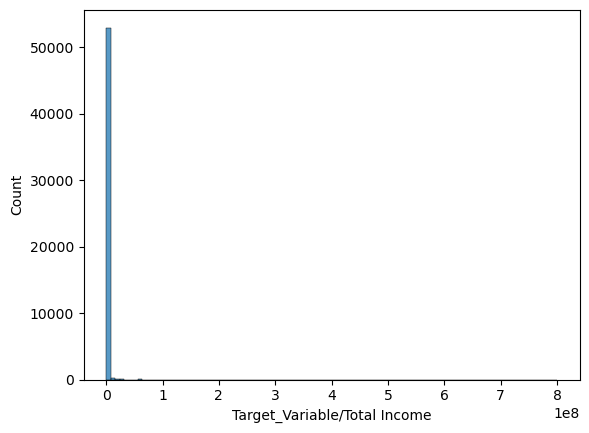

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Target_Variable/Total Income'], bins=100)
plt.show()


In [251]:
data['Current Address'].dtype


dtype('O')

In [252]:
data.columns

Index(['R022villagecatagripara', 'K022villagecatagripara',
       'K021-Ambient temperature-min', 'K021-Ambient temperature-max',
       'K022-Ambient temperature-min', 'K022-Ambient temperature-max',
       'R021-Ambient temperature-min', 'R021-Ambient temperature-max',
       'R022-Ambient temperature-min', 'R022-Ambient temperature-max',
       'K021-Seasonal Average Rainfall (mm)',
       'K022-Seasonal Average Rainfall (mm)',
       'R021-Seasonal Average Rainfall (mm)',
       'R022-Seasonal Average Rainfall (mm)', 'Target_Variable/Total Income',
       'No_of_Active_Loan_In_Bureau', 'Total_Land_For_Agriculture',
       'Perc_of_house_with_6plus_room', 'perc_of_pop_living_in_hh_electricity',
       'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
       'mat_roof_Metal_GI_Asbestos_sheets',
       'perc_of_Wall_material_with_Burnt_brick',
       'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
       'Road density (Km/ SqKm)', 'Rabi Seasons Type of soi

In [253]:
data.isna().sum()

R022villagecatagripara                                              0
K022villagecatagripara                                              0
K021-Ambient temperature-min                                        0
K021-Ambient temperature-max                                        0
K022-Ambient temperature-min                                        0
K022-Ambient temperature-max                                        0
R021-Ambient temperature-min                                        0
R021-Ambient temperature-max                                        0
R022-Ambient temperature-min                                        0
R022-Ambient temperature-max                                        0
K021-Seasonal Average Rainfall (mm)                                 0
K022-Seasonal Average Rainfall (mm)                                 0
R021-Seasonal Average Rainfall (mm)                                 0
R022-Seasonal Average Rainfall (mm)                                 0
Target_Variable/Tota

In [254]:
df['Total_Land_For_Agriculture']

0        10.00
1        12.00
2         6.00
3         5.00
4         5.25
         ...  
53298      NaN
53299     9.00
53300     6.00
53301     5.00
53302     5.00
Name: Total_Land_For_Agriculture, Length: 53272, dtype: float64

In [255]:
dff=pd.DataFrame(data['Target_Variable/Total Income'])

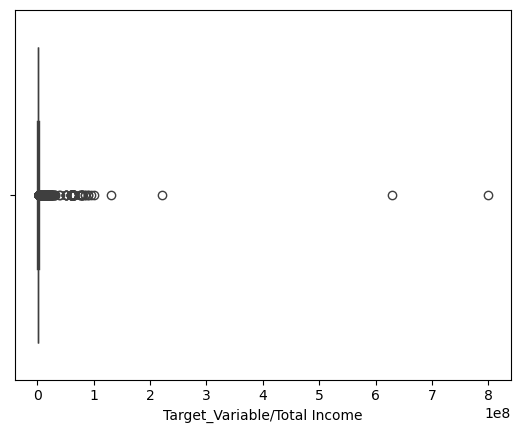

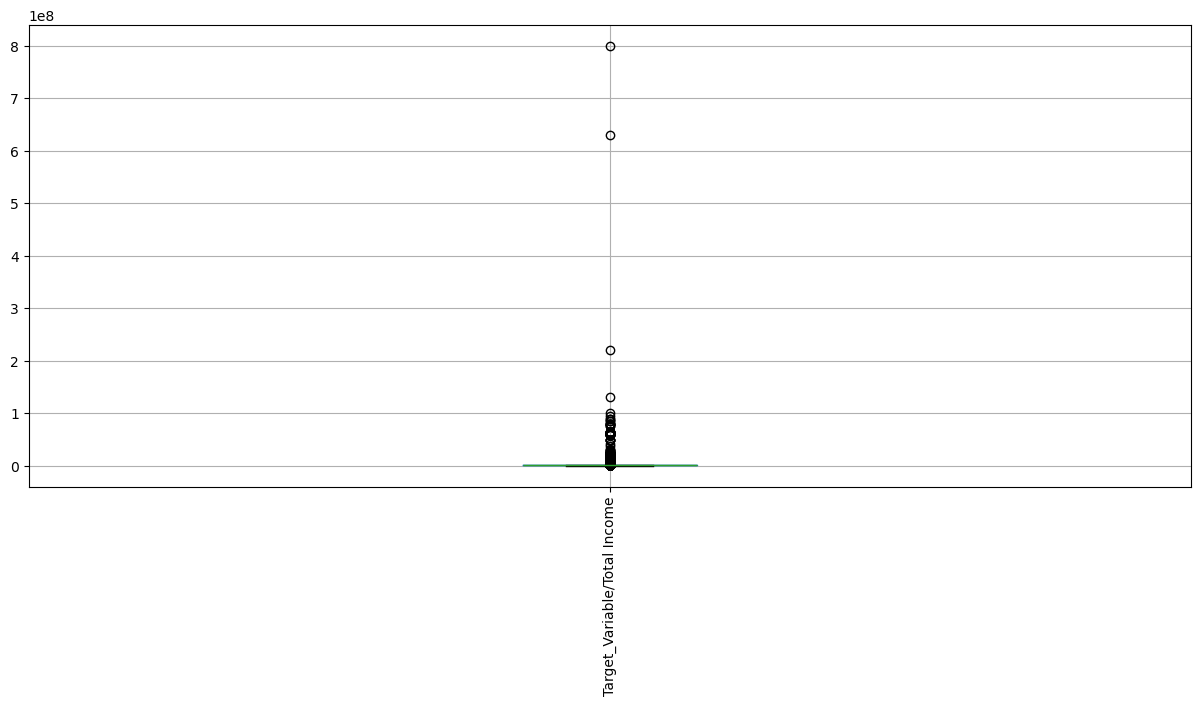

In [256]:
sns.boxplot(x=dff['Target_Variable/Total Income'])
plt.show()

# For all numeric columns
dff.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

In [257]:
series =dff['Target_Variable/Total Income']

# Calculate Mean
mean_value = series.mean()

# Calculate Median
median_value = series.median()

# Calculate Mode (may return multiple values)
mode_value = series.mode()

# Display results
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value.tolist())

Mean: 1264710.8662816943
Median: 950000.0
Mode: [800000.0]


In [258]:
dff.count()

Target_Variable/Total Income    53164
dtype: int64

In [259]:
capping0=pd.DataFrame()
upper_cap = dff['Target_Variable/Total Income'].quantile(0.99)
capping0['Target_capped'] = dff['Target_Variable/Total Income'].clip(upper=upper_cap)


In [260]:
capping0.count()

Target_capped    53164
dtype: int64

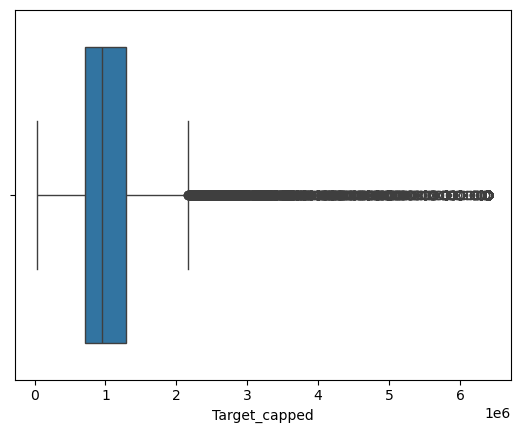

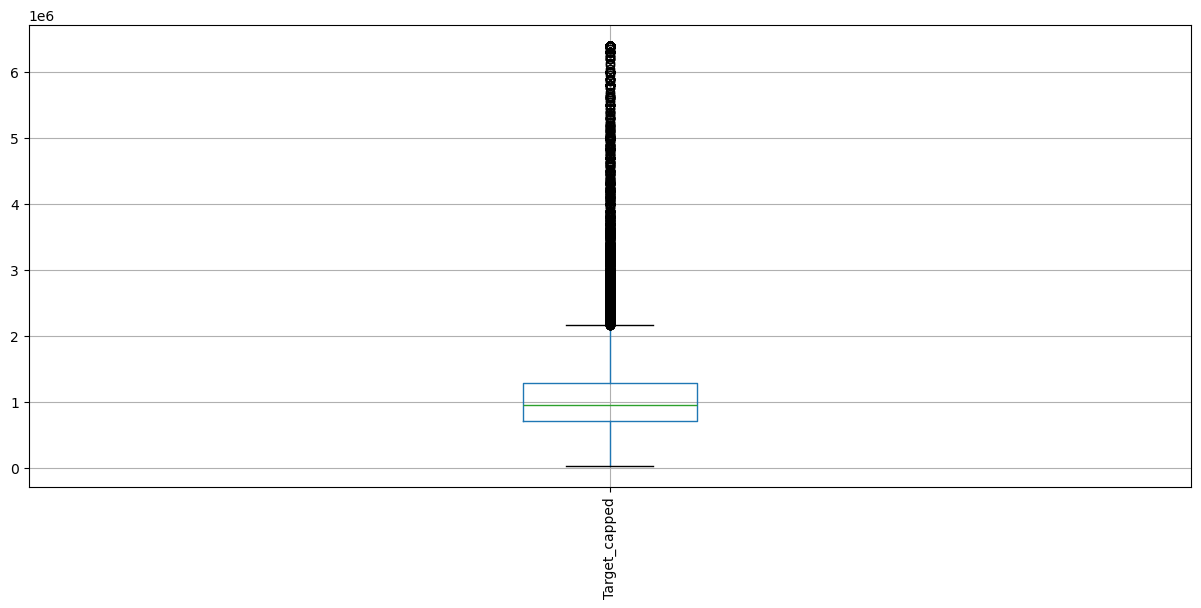

In [261]:
sns.boxplot(x=capping0['Target_capped'])
plt.show()

# For all numeric columns
capping0.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

In [262]:
capping1=pd.DataFrame()
upper_cap = dff['Target_Variable/Total Income'].quantile(0.90)
capping1['Target_capped'] = dff['Target_Variable/Total Income'].clip(upper=upper_cap)

In [263]:
capping1.count()

Target_capped    53164
dtype: int64

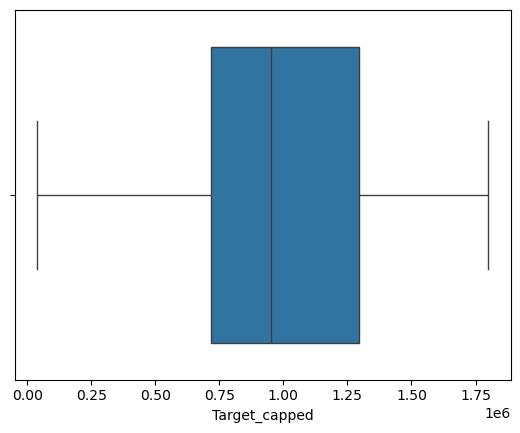

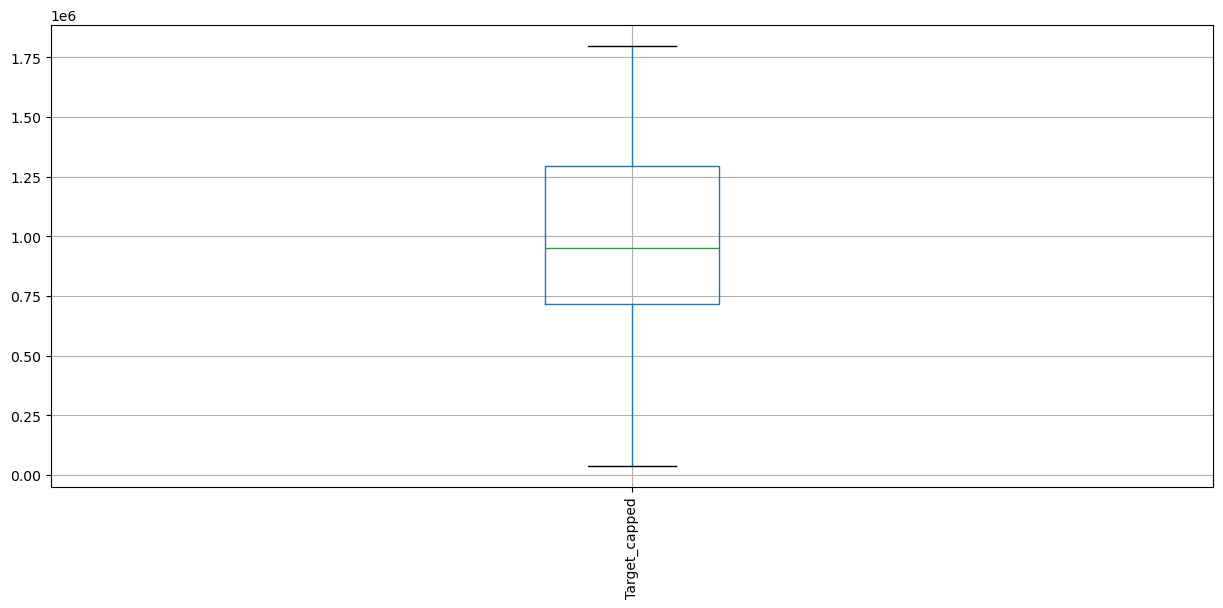

In [264]:
sns.boxplot(x=capping1['Target_capped'])
plt.show()

# For all numeric columns
capping1.boxplot(figsize=(15,6))
plt.xticks(rotation=90)
plt.show()

In [265]:
capping1.count()

Target_capped    53164
dtype: int64

In [266]:
print(capping1.max())
print(capping1.min())

Target_capped    1800000.0
dtype: float64
Target_capped    40000.0
dtype: float64


In [267]:
x0=data
y=capping1

In [268]:
y = np.log1p(y)


In [269]:
data

,R022villagecatagripara,K022villagecatagripara,K021-Ambient temperature-min,K021-Ambient temperature-max,K022-Ambient temperature-min,K022-Ambient temperature-max,R021-Ambient temperature-min,R021-Ambient temperature-max,R022-Ambient temperature-min,R022-Ambient temperature-max,...,water,wetland,SEX,MARITAL_STATUS_NK,MARITAL_STATUS_S,Current Address,Permanent Address,Unknown,DISTRICT,CITY
0,0.0,0.0,23.29,29.78,23.34,30.33,16.48,30.02,16.19,29.07,...,1.0,0.0,1.0,False,False,False,False,True,0.76,0.09
1,1.0,1.0,23.88,30.97,23.70,31.03,15.17,28.53,14.93,27.92,...,0.0,0.0,1.0,False,False,False,True,False,0.05,0.63
2,0.0,0.0,23.39,29.89,23.28,29.99,19.54,30.98,19.70,30.52,...,1.0,0.0,1.0,False,False,False,False,True,0.64,0.08
3,1.0,1.0,23.14,30.22,23.25,31.26,16.21,29.91,15.62,28.67,...,0.0,0.0,1.0,False,False,False,False,True,0.60,0.57
4,1.0,1.0,21.81,28.33,22.00,28.61,19.32,31.01,19.81,31.15,...,0.0,0.0,1.0,False,False,False,False,True,0.55,0.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53267,0.0,0.0,21.46,29.98,21.25,30.36,20.82,31.05,20.50,30.20,...,0.0,0.0,1.0,False,True,False,True,False,0.36,0.35
53268,0.0,0.0,23.36,29.98,23.30,30.36,17.08,27.92,17.37,27.96,...,0.0,0.0,1.0,False,False,False,True,False,0.36,0.03
53269,0.0,0.0,20.96,27.78,20.61,27.82,18.32,30.00,18.67,29.35,...,0.0,0.0,1.0,False,False,False,True,False,0.36,0.35
53270,0.0,0.0,21.86,28.50,21.63,28.54,19.52,30.73,19.87,30.69,...,0.0,0.0,1.0,False,False,False,True,False,0.36,0.04


In [270]:
series =capping1['Target_capped']

# Calculate Mean
mean_value = series.mean()

# Calculate Median
median_value = series.median()

# Calculate Mode (may return multiple values)
mode_value = series.mode()

# Display results
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value.tolist())

Mean: 1033622.6544654277
Median: 950000.0
Mode: [1800000.0]


In [271]:
correlations = data.corr(numeric_only=True)['Target_Variable/Total Income'].sort_values(ascending=False)
print(correlations)


Target_Variable/Total Income                                        1.000000
Total_Land_For_Agriculture                                          0.031399
perc_of_pop_living_in_hh_electricity                                0.025771
R022-Seasonal Average Rainfall (mm)                                 0.010372
No_of_Active_Loan_In_Bureau                                         0.005404
R021-Seasonal Average Rainfall (mm)                                 0.004761
perc_of_Wall_material_with_Burnt_brick                              0.003341
Perc_of_house_with_6plus_room                                       0.002291
K022-Ambient temperature-max                                        0.001749
Road density (Km/ SqKm)                                             0.001258
perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k        0.000860
perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms         0.000858
DISTRICT                                                            0.000458

In [272]:
x0= x0.drop(columns=[ 'Current Address', 'Permanent Address','MARITAL_STATUS_NK','MARITAL_STATUS_S','Unknown','Target_Variable/Total Income'])


In [273]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x0, y, test_size=0.3, random_state=101)

In [274]:
x_train

,R022villagecatagripara,K022villagecatagripara,K021-Ambient temperature-min,K021-Ambient temperature-max,K022-Ambient temperature-min,K022-Ambient temperature-max,R021-Ambient temperature-min,R021-Ambient temperature-max,R022-Ambient temperature-min,R022-Ambient temperature-max,...,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2022,reservoir,river,riverbank,water,wetland,SEX,DISTRICT,CITY
28823,0.0,0.0,24.59,31.76,24.02,31.24,15.05,28.17,14.73,26.73,...,91.03,88.87,0.0,0.0,0.0,0.0,0.0,1.0,0.29,0.41
23568,0.0,1.0,23.40,30.10,23.25,30.39,18.36,30.77,18.06,30.09,...,94.52,89.06,1.0,1.0,0.0,1.0,0.0,1.0,0.11,0.86
3958,0.0,0.0,21.18,27.35,20.87,27.39,19.10,30.45,19.20,29.73,...,89.12,95.83,1.0,0.0,0.0,0.0,0.0,1.0,0.40,0.40
27037,0.0,0.0,20.36,29.98,20.05,30.36,17.57,28.93,18.00,28.61,...,113.84,123.10,0.0,0.0,0.0,1.0,0.0,1.0,0.21,0.93
45254,0.0,0.0,24.72,30.98,24.64,31.33,20.07,31.39,20.72,31.21,...,75.56,77.94,0.0,0.0,0.0,1.0,0.0,1.0,0.92,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5706,0.0,1.0,23.18,29.29,23.29,29.74,20.01,31.98,20.09,31.29,...,84.75,86.76,0.0,1.0,0.0,0.0,0.0,0.0,0.86,0.74
8021,0.0,0.0,22.96,29.19,22.73,29.33,19.70,31.34,20.28,31.10,...,78.54,82.83,0.0,0.0,0.0,0.0,0.0,0.0,0.73,0.23
17779,0.0,0.0,23.80,30.76,23.64,30.83,15.41,28.60,15.73,29.00,...,94.44,90.81,0.0,0.0,0.0,0.0,0.0,1.0,0.95,0.70
17965,1.0,1.0,23.03,29.74,23.02,30.16,16.69,29.37,16.88,29.13,...,99.28,93.25,0.0,0.0,0.0,0.0,0.0,1.0,0.15,0.18


In [275]:
print(x_train.shape)
print(y_train.shape)

(37214, 34)
(37214, 1)


In [276]:
print(x0.shape)
print(y.shape)

(53164, 34)
(53164, 1)


In [277]:
x0.columns

Index(['R022villagecatagripara', 'K022villagecatagripara',
       'K021-Ambient temperature-min', 'K021-Ambient temperature-max',
       'K022-Ambient temperature-min', 'K022-Ambient temperature-max',
       'R021-Ambient temperature-min', 'R021-Ambient temperature-max',
       'R022-Ambient temperature-min', 'R022-Ambient temperature-max',
       'K021-Seasonal Average Rainfall (mm)',
       'K022-Seasonal Average Rainfall (mm)',
       'R021-Seasonal Average Rainfall (mm)',
       'R022-Seasonal Average Rainfall (mm)', 'No_of_Active_Loan_In_Bureau',
       'Total_Land_For_Agriculture', 'Perc_of_house_with_6plus_room',
       'perc_of_pop_living_in_hh_electricity',
       'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms',
       'mat_roof_Metal_GI_Asbestos_sheets',
       'perc_of_Wall_material_with_Burnt_brick',
       'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k',
       'Road density (Km/ SqKm)', 'Rabi Seasons Type of soil in 2022',
       'Rabi Seasons

In [278]:


model = xgb.XGBRegressor(
    n_estimators=1000,   #100
    learning_rate=0.1,
    max_depth=6,         
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)

In [279]:
y_test.head(2)

,Target_capped
28479,14.285515
1465,13.955273


In [280]:
y1_test = np.expm1(y_test)

In [281]:
y1_test

,Target_capped
28479,1600000.0
1465,1150000.0
9858,1000000.0
33288,560000.0
16488,750000.0
...,...
13979,1456000.0
42904,1800000.0
17645,1700000.0
41747,1056300.0


In [282]:

y_pred1 = np.expm1(y_pred)


In [283]:
y_pred1

array([1077763.9 ,  845185.1 , 1158514.9 , ..., 1385773.  ,  827841.6 ,
        973997.94], dtype=float32)

In [284]:
mape = mean_absolute_percentage_error(y1_test, y_pred1)
print("MAPE:", mape * 100, "%")

MAPE: 22.612345218658447 %


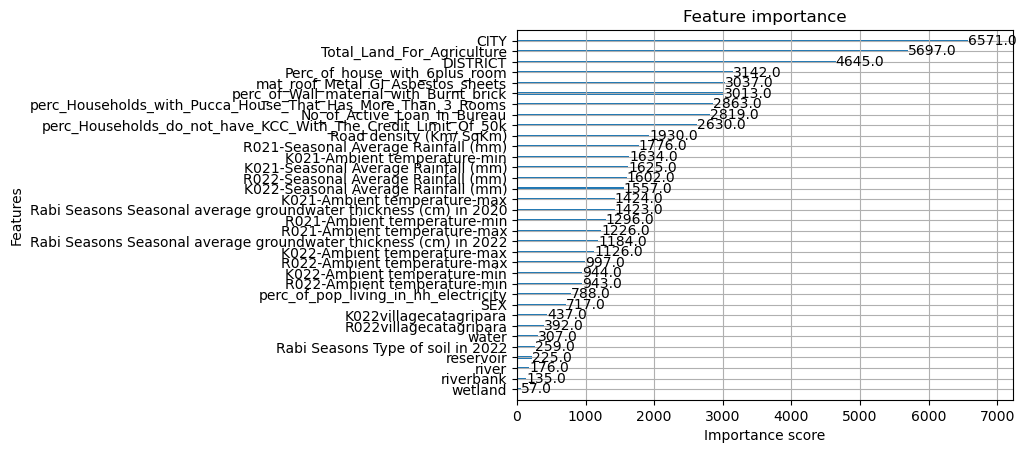

In [285]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()




<Axes: ylabel='Count'>

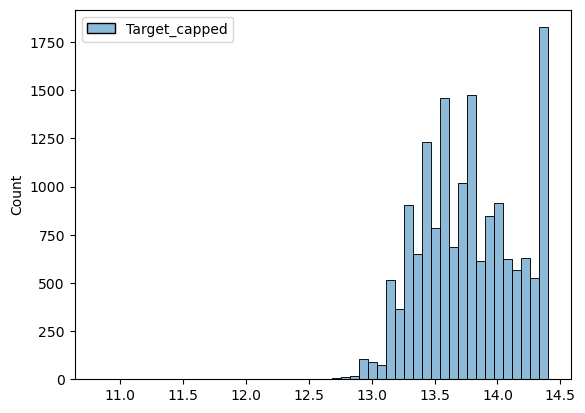

In [286]:
import seaborn as sns
sns.histplot(y_test, bins=50)



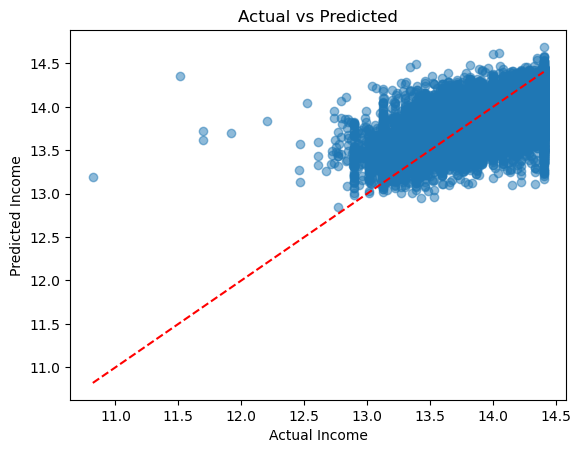

In [287]:
#. Plot Predictions vs Actual
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()



Text(0.5, 1.0, 'Target Income Distribution')

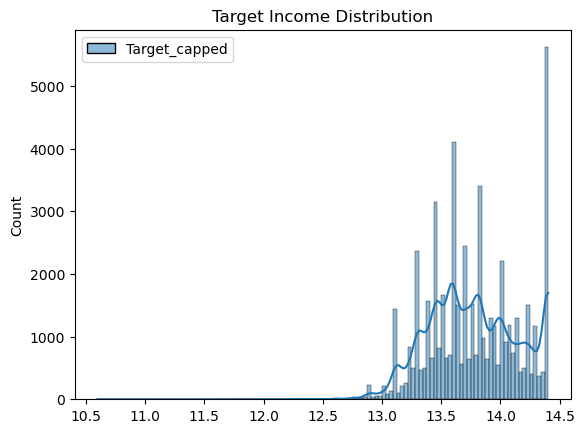

In [288]:

import seaborn as sns
sns.histplot(y, kde=True)
plt.title("Target Income Distribution")


In [289]:

from sklearn.feature_selection import RFE
rfe = RFE(estimator=model, n_features_to_select=10, step=1)
rfe.fit(x_train, y_train)

# Step 4: Print selected features
selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features.tolist())

# Step 5: Use only selected features to train final model
x_train_rfe = x_train[selected_features]
x_test_rfe = x_test[selected_features]

model.fit(x_train_rfe, y_train)
y_pred = model.predict(x_test_rfe)

# Step 6: Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

Selected Features: ['R022-Ambient temperature-min', 'R022-Ambient temperature-max', 'K021-Seasonal Average Rainfall (mm)', 'K022-Seasonal Average Rainfall (mm)', 'R021-Seasonal Average Rainfall (mm)', 'R022-Seasonal Average Rainfall (mm)', 'Total_Land_For_Agriculture', 'Rabi Seasons Type of soil in 2022', 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2020', 'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022']
MAE: 0.23691774904727936
MSE: 0.09583120793104172
RMSE: 0.3095661608300263
R² Score: 0.3417642116546631


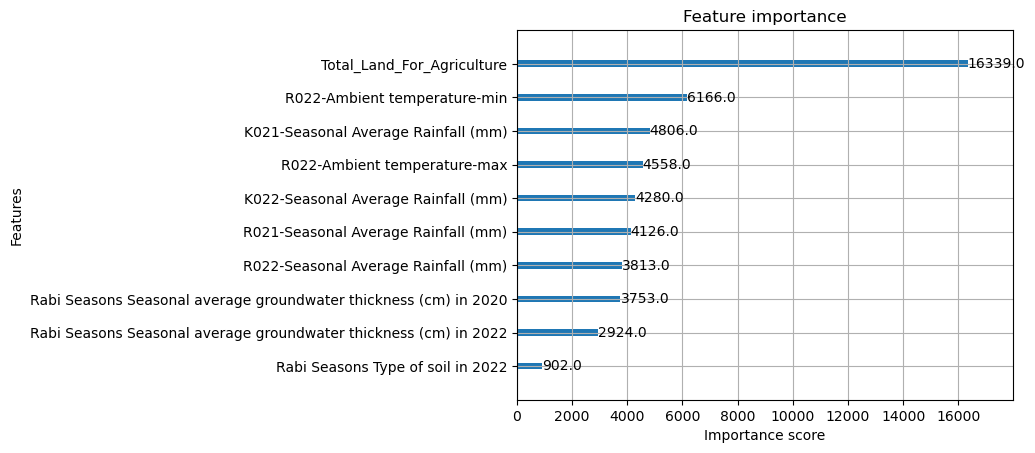

In [290]:
import matplotlib.pyplot as plt
xgb.plot_importance(model)
plt.show()

In [291]:
y_pred

array([13.946817, 13.774454, 13.881273, ..., 13.882791, 13.653265,
       14.020477], dtype=float32)

In [292]:
y_pred = np.expm1(y_pred)

In [293]:
y_pred 

array([1140316.6 ,  959773.94, 1067972.2 , ..., 1069593.9 ,  850231.4 ,
       1227483.2 ], dtype=float32)

In [294]:
y_test = np.expm1(y_test)

In [295]:
y_test.head(2)

,Target_capped
28479,1600000.0
1465,1150000.0


In [296]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE:", mape * 100, "%")

MAPE: 24.304690957069397 %


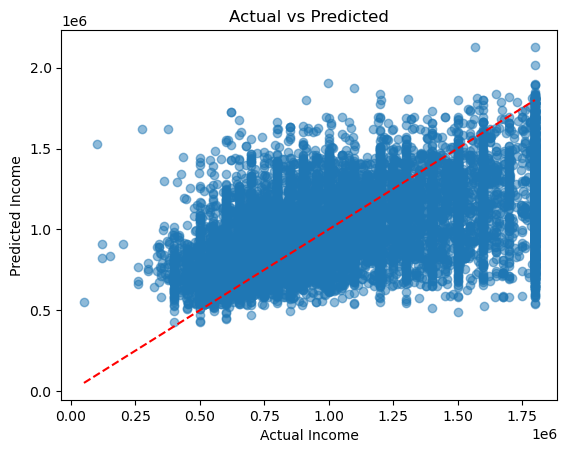

In [297]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


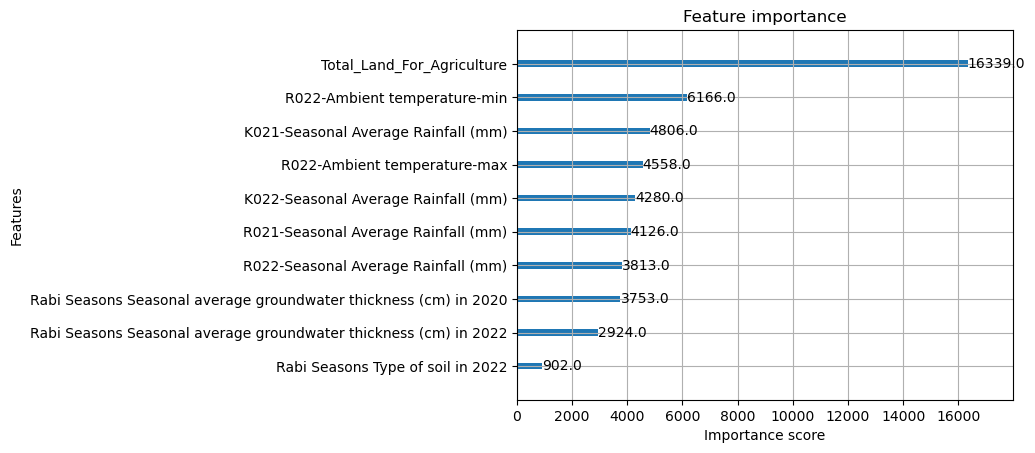

In [298]:
xgb.plot_importance(model)
plt.show()


In [299]:
import joblib

# Save model
joblib.dump(model, 'xgb_model.pkl')

# Save the feature list (very important for future predictions)
selected_features = ['K021-Ambient temperature-min', 'K022-Ambient temperature-min', 'R022-Ambient temperature-min', 
                     'K022-Seasonal Average Rainfall (mm)', 'R021-Seasonal Average Rainfall (mm)', 
                     'Total_Land_For_Agriculture', 'perc_of_pop_living_in_hh_electricity', 
                     'perc_of_Wall_material_with_Burnt_brick', 'Rabi Seasons Type of soil in 2022', 
                     'Rabi Seasons Seasonal average groundwater thickness (cm) in 2022']

joblib.dump(selected_features, 'selected_features.pkl')


['selected_features.pkl']

In [300]:
y_pred

array([1140316.6 ,  959773.94, 1067972.2 , ..., 1069593.9 ,  850231.4 ,
       1227483.2 ], dtype=float32)